# Series Temporais com Base de Bikes

## Tratamento da base de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os
import numpy as np
import datetime

In [2]:
base = pd.read_csv('train.csv')
base.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
base.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
base = pd.read_csv('train.csv', parse_dates=['datetime'], index_col=0)
base

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [5]:
base.drop(columns = ['season', 'holiday','workingday','weather','temp','atemp', 'humidity','windspeed','casual', 'registered'], axis=1, inplace = True)
base

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-19 19:00:00,336
2012-12-19 20:00:00,241
2012-12-19 21:00:00,168


In [6]:
# Previsão será por dia
base = base.groupby(pd.Grouper(freq = 'D')).sum()
base

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-15,5047
2012-12-16,3786
2012-12-17,4585


In [7]:
# Separação
base_teste = base.copy()
base_teste.shape

(719, 1)

In [8]:
base_treinamento = base.iloc[0:689,:]
base_treinamento

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-11-15,5445
2012-11-16,5698
2012-11-17,5629


In [9]:
# Treinamento desse algoritmo é feito com mais dados de teste (30) a previsão será nessa quantidade de dias. A base de treinamentoo será menor que a base de teste.
base_treinamento.index.min(), base_treinamento.index.max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-11-19 00:00:00'))

In [10]:
base_teste.index.min(), base_teste.index.max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 00:00:00'))

In [11]:
dt_data_inicial = "2011-01-01"
dt_data_final_treinamento = "2012-11-19"
dt_previsao_maxima = "2012-12-19"

faixa_treinamento = pd.date_range(start=dt_data_inicial, end=dt_data_final_treinamento, freq="D")
faixa_teste = pd.date_range(start=dt_data_inicial, end=dt_previsao_maxima, freq="D")

In [12]:
faixa_treinamento.shape

(689,)

In [13]:
faixa_teste.shape 

(719,)

In [14]:
serie_temporal_treinamento = []
serie_temporal_teste = []

serie_temporal_treinamento.append(base_treinamento[faixa_treinamento[0]:faixa_treinamento[688]]['count'])
serie_temporal_teste.append(base_teste[faixa_teste[0]:faixa_teste[718]]['count'])

In [15]:
type(serie_temporal_treinamento), type(serie_temporal_teste)

(list, list)

In [16]:
serie_temporal_treinamento

[datetime
 2011-01-01     985
 2011-01-02     801
 2011-01-03    1349
 2011-01-04    1562
 2011-01-05    1600
               ... 
 2012-11-15    5445
 2012-11-16    5698
 2012-11-17    5629
 2012-11-18    4669
 2012-11-19    5499
 Freq: D, Name: count, Length: 689, dtype: int64]

In [17]:
serie_temporal_teste

[datetime
 2011-01-01     985
 2011-01-02     801
 2011-01-03    1349
 2011-01-04    1562
 2011-01-05    1600
               ... 
 2012-12-15    5047
 2012-12-16    3786
 2012-12-17    4585
 2012-12-18    5557
 2012-12-19    5267
 Freq: D, Name: count, Length: 719, dtype: int64]

In [18]:
len(serie_temporal_treinamento[0]), len(serie_temporal_teste[0])

(689, 719)

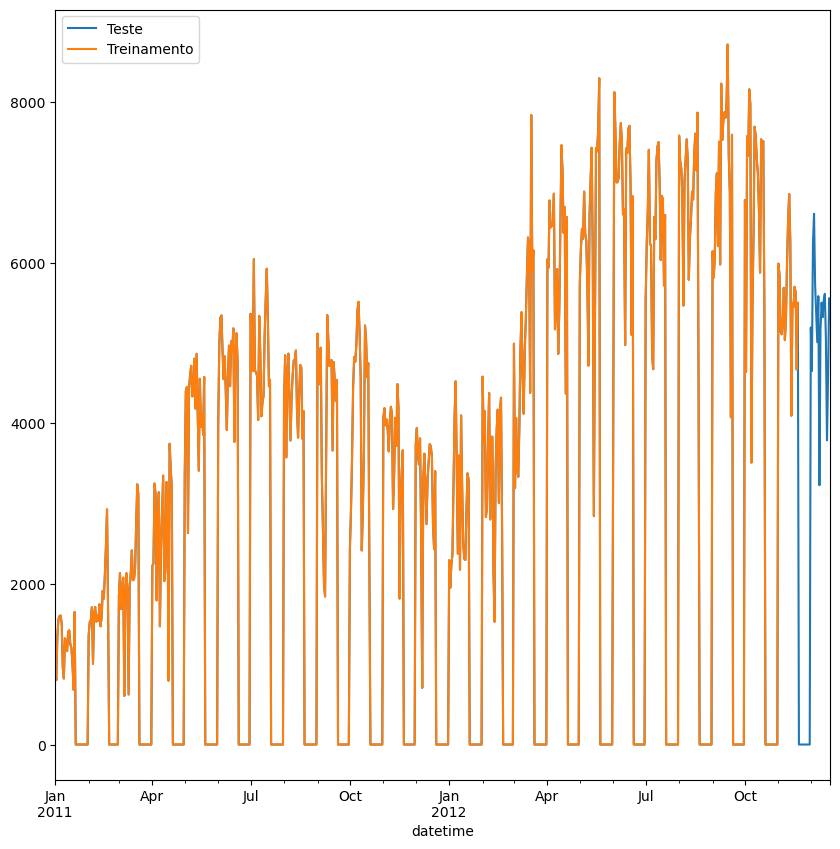

In [19]:
plt.figure(figsize=(10,10))
serie_temporal_teste[0].plot(label = "Teste")
serie_temporal_treinamento[0].plot(label = "Treinamento")
plt.legend()
plt.show()

In [23]:
# Preparando os dados para enviar para o algoritmo de DeepAr

# Função de eliminação de valores inválidos
def encode_target(ts):
    return [x if np.isfinite(x) else "NaN" for x in ts]

In [22]:
encode_target(serie_temporal_treinamento[0][0:15])

[985,
 801,
 1349,
 1562,
 1600,
 1606,
 1510,
 959,
 822,
 1321,
 1263,
 1162,
 1406,
 1421,
 1248]

In [24]:
def series_to_obj(ts):
    obj = {"start": str(ts.index[0]), "target": encode_target(ts)}
    return obj

In [25]:
series_to_obj(serie_temporal_treinamento[0][0:9])

{'start': '2011-01-01 00:00:00',
 'target': [985, 801, 1349, 1562, 1600, 1606, 1510, 959, 822]}

In [28]:
# para ultilizar o algoritmo os dados precisam estar em formato json
def series_to_jsonline(ts):
    return json.dumps(series_to_obj(ts))

In [29]:
series_to_jsonline(serie_temporal_treinamento[0][0:5])

'{"start": "2011-01-01 00:00:00", "target": [985, 801, 1349, 1562, 1600]}'

In [30]:
# Criando um arquivo JSON com ambas as bases
encoding = 'utf-8'
arquivo_json_treinamento = 'train.json'
arquivo_json_teste = 'test.json'
with open(arquivo_json_treinamento, 'wb') as fp:
    for ts in serie_temporal_treinamento:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

with open(arquivo_json_teste, 'wb') as fp:
    for ts in serie_temporal_teste:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))


## Configuração SageMaker

In [31]:
import boto3
import sagemaker

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [32]:
session = sagemaker.Session()
role = sagemaker.get_execution_role()
job_name = 'deepar-bike'
bucket = 'emanuelle-sprint04'
subpasta_dataset = 'datasets/bike'
subpasta_modelo = 'modelos/bike/deepar'
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, subpasta_dataset, 'train.json')
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, subpasta_dataset, 'test.json')
output_location = 's3://{}/{}/output'.format(bucket, subpasta_modelo)

print('Role: {}'.format(role))
print('Localização da base de treinamento: {}'.format(s3_train_data))
print('Localização da base de teste: {}'.format(s3_test_data))
print('Modelo será salvo em: {}'.format(output_location))

Role: arn:aws:iam::831926590523:role/service-role/AmazonSageMaker-ExecutionRole-20250103T092223
Localização da base de treinamento: s3://emanuelle-sprint04/datasets/bike/train/train.json
Localização da base de teste: s3://emanuelle-sprint04/datasets/bike/test/test.json
Modelo será salvo em: s3://emanuelle-sprint04/modelos/bike/deepar/output


In [33]:
# Função para salvar os arquivos JSON no S3
def escreve_s3(arquivo, bucket, nome):
    with open(arquivo, 'rb') as f:
        return boto3.Session().resource('s3').Bucket(bucket).Object(nome).upload_fileobj(f)

In [35]:
# Salvando
escreve_s3('train.json', bucket, os.path.join(subpasta_dataset, 'train', 'train.json'))
escreve_s3('test.json', bucket, os.path.join(subpasta_dataset, 'test', 'test.json'))

In [36]:
print(os.path.join(subpasta_dataset, 'train', 'train.json'))
print(os.path.join(subpasta_dataset, 'test', 'test.json'))

datasets/bike/train/train.json
datasets/bike/test/test.json


## Treinamento do DeepAR

In [37]:
container = sagemaker.image_uris.retrieve(framework = 'forecasting-deepar', region = session.boto_region_name)

In [52]:
deepar = sagemaker.estimator.Estimator(image_uri = container,
                                       role = role,
                                       instance_count = 1,
                                       instance_type = 'ml.m5.large',
                                       output_path = output_location,
                                       sagemaker_session = session,
                                       base_job_name = job_name,
                                       use_spot_instances = False,
                                       max_run = 3600)

In [53]:
# Criando alguns parametros
freq = 'D'
prediction_length = 30 # dias
context_length = 30 # passado para prever

In [54]:
hyperparametros = {
    'time_freq': freq,
    'epochs': "20", # épocas para o treinamento da rede neural
    'context_length': str(context_length),
    'prediction_length': str(prediction_length)
}

In [55]:
deepar.set_hyperparameters(**hyperparametros)

In [56]:
# Passando para formato de dicionário
data_channels = {'train': s3_train_data, 'test': s3_test_data}
data_channels

{'train': 's3://emanuelle-sprint04/datasets/bike/train/train.json',
 'test': 's3://emanuelle-sprint04/datasets/bike/test/test.json'}

In [57]:
deepar.fit(inputs = data_channels)

INFO:sagemaker:Creating training-job with name: deepar-bike-2025-01-08-17-28-39-759


2025-01-08 17:28:43 Starting - Starting the training job...
2025-01-08 17:28:58 Starting - Preparing the instances for training...
2025-01-08 17:29:22 Downloading - Downloading input data...
2025-01-08 17:29:57 Downloading - Downloading the training image...............
2025-01-08 17:32:29 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
Running custom environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
[01/08/2025 17:32:35 INFO 139775033849664] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'_kvstore': 'auto', '_num_gpus': 'auto', '_num_kv_servers': 'auto', '_tuning_objective_metric': '', 'cardinality': 'auto', 'dropout_rate': '0.10', 'early_stopping_patience': '

## Deploy e Previsões

In [58]:
job_name = deepar.latest_training_job.name
print('Job name: ', job_name)

Job name:  deepar-bike-2025-01-08-17-28-39-759


In [59]:
endpoint = session.endpoint_from_job(job_name = job_name,
                                     initial_instance_count = 1,
                                     instance_type = "ml.m5.large",
                                     image_uri = container,
                                     role = role)

INFO:sagemaker:Creating model with name: deepar-bike-2025-01-08-17-28-39-759
INFO:sagemaker:Creating endpoint-config with name deepar-bike-2025-01-08-17-28-39-759
INFO:sagemaker:Creating endpoint with name deepar-bike-2025-01-08-17-28-39-759


----------!

In [60]:
print('Endpoint: ', endpoint)

Endpoint:  deepar-bike-2025-01-08-17-28-39-759


In [61]:
# Previsor:
# Código está presente na documentação

class DeepARPredictor(sagemaker.predictor.Predictor):

    def set_prediction_parameters(self, freq, prediction_length):
        """Set the time frequency and prediction length parameters. 
          This method **must** be called before being able to use `predict`.
        
        Parameters:
        freq -- string indicating the time frequency
        prediction_length -- integer, number of predicted time points
        
        Return value: none.
        """
        self.freq = freq
        self.prediction_length = prediction_length
        
    def predict(self, ts, cat=None, dynamic_feat=None, 
                encoding="utf-8", num_samples=100, quantiles=["0.1", "0.5", "0.9"]):
        """Requests the prediction of for the time series listed in `ts`, 
           each with the (optional) corresponding category listed in `cat`.
        
        Parameters:
        ts -- list of `pandas.Series` objects, the time series to predict
        cat -- list of integers (default: None)
        encoding -- string, encoding to use for the request (default: "utf-8")
        num_samples -- integer, number of samples to compute at prediction time (default: 100)
        quantiles -- list of strings specifying the quantiles to compute (default: ["0.1", "0.5", "0.9"])
        
        Return value: list of `pandas.DataFrame` objects, each containing the predictions
        """
        prediction_times = [x.index[-1] + datetime.timedelta(hours=1) for x in ts] 
        
        req = self.__encode_request(ts, cat, dynamic_feat, encoding, num_samples, quantiles)
        res = super(DeepARPredictor, self).predict(req)
        return self.__decode_response(res, prediction_times, encoding)
    
    def __encode_request(self, ts, cat, dynamic_feat, encoding, num_samples, quantiles):
        
        instances = [series_to_obj(ts[k]) for k in range(len(ts))]
        
        configuration = {"num_samples": num_samples, "output_types": ["quantiles"], "quantiles": quantiles}
        http_request_data = {"instances": instances, "configuration": configuration}
        return json.dumps(http_request_data).encode(encoding)
    
    def __decode_response(self, response, prediction_times, encoding):
        response_data = json.loads(response.decode(encoding))
        list_of_df = []
        for k in range(len(prediction_times)):
            prediction_index = pd.date_range(start=prediction_times[k], freq=self.freq, periods=self.prediction_length)
            list_of_df.append(pd.DataFrame(data=response_data['predictions'][k]['quantiles'], index=prediction_index))
        return list_of_df

In [62]:
predictor = DeepARPredictor(endpoint_name = 'deepar-bike-2025-01-08-17-28-39-759',
                            sagemaker_session = session)
predictor.set_prediction_parameters(freq, prediction_length)
predictor.serializer.content_type = "application/json" #tipo dos dados 

In [63]:
previsoes = predictor.predict(serie_temporal_treinamento)

In [64]:
len(previsoes[0]) 

30

In [65]:
previsoes

[                             0.1          0.5          0.9
 2012-11-19 01:00:00  -142.165344   461.282318  1050.836792
 2012-11-20 01:00:00  -376.209778  -134.030701    61.878403
 2012-11-21 01:00:00  -192.854263   -29.934233   148.101257
 2012-11-22 01:00:00  -156.160370   -15.705965   113.311226
 2012-11-23 01:00:00  -138.905884   -23.962034    63.436050
 2012-11-24 01:00:00   -86.104126    -5.802635   103.048729
 2012-11-25 01:00:00   -30.723015    64.787064   186.887939
 2012-11-26 01:00:00   -36.308815    28.278656   138.187531
 2012-11-27 01:00:00   -80.926483    94.186752   266.625671
 2012-11-28 01:00:00  -174.676270   -29.519384   136.896469
 2012-11-29 01:00:00  -294.125488   -13.990124   305.750122
 2012-11-30 01:00:00  1279.434692  2018.423584  2807.299316
 2012-12-01 01:00:00  3776.261230  4684.836914  5705.165039
 2012-12-02 01:00:00  4607.991211  5458.002930  6836.391113
 2012-12-03 01:00:00  4652.214355  5680.089844  6984.652344
 2012-12-04 01:00:00  4455.816895  5498.

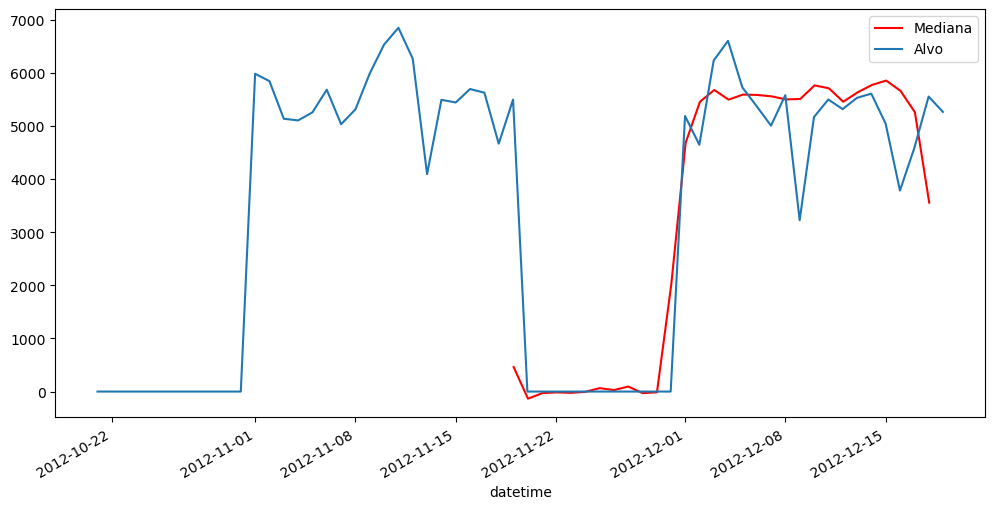

In [66]:
for k in range(len(previsoes)):
    plt.figure(figsize=(12,6))
    previsoes[k]['0.5'].plot(label = 'Mediana', color = 'red')
    serie_temporal_teste[k][-prediction_length - context_length:].plot(label = 'Alvo') #buscando os últimos 60 reg
    # p10 = previsoes[k]['0.1']
    # p90 = previsoes[k]['0.9']
    # plt.fill_between(p10.index, p10, p90, color = 'y', alpha = 0.5, label = 'Intervalo de confiança')
    plt.legend()
    plt.show()

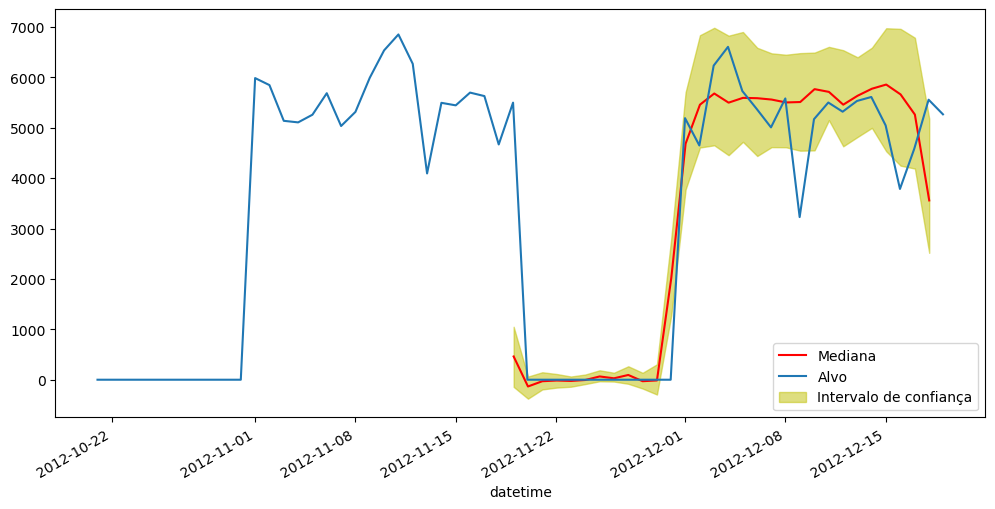

In [67]:
for k in range(len(previsoes)):
    plt.figure(figsize=(12,6))
    previsoes[k]['0.5'].plot(label = 'Mediana', color = 'red')
    serie_temporal_teste[k][-prediction_length - context_length:].plot(label = 'Alvo') #buscando os últimos 60 reg
    p10 = previsoes[k]['0.1']
    p90 = previsoes[k]['0.9']
    plt.fill_between(p10.index, p10, p90, color = 'y', alpha = 0.5, label = 'Intervalo de confiança')
    plt.legend()
    plt.show()

In [68]:
df_teste = base.iloc[689:,:]
len(df_teste)

30

In [69]:
df_teste

,count
datetime,
2012-11-20,0
2012-11-21,0
2012-11-22,0
2012-11-23,0
2012-11-24,0
2012-11-25,0
2012-11-26,0
2012-11-27,0
2012-11-28,0


In [70]:
previsoes2 = previsoes[0]['0.5'].values
previsoes2

array([ 4.61282318e+02, -1.34030701e+02, -2.99342327e+01, -1.57059650e+01,
       -2.39620342e+01, -5.80263519e+00,  6.47870636e+01,  2.82786560e+01,
        9.41867523e+01, -2.95193844e+01, -1.39901237e+01,  2.01842358e+03,
        4.68483691e+03,  5.45800293e+03,  5.68008984e+03,  5.49846338e+03,
        5.59358789e+03,  5.58677832e+03,  5.55997168e+03,  5.50252246e+03,
        5.51101074e+03,  5.76673877e+03,  5.71210254e+03,  5.45844531e+03,
        5.63518066e+03,  5.77480322e+03,  5.85759033e+03,  5.66237744e+03,
        5.26142871e+03,  3.55841772e+03])

In [71]:
esperado = df_teste['count'].values
esperado

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       5191, 4649, 6234, 6606, 5729, 5375, 5008, 5582, 3228, 5170, 5501,
       5319, 5532, 5611, 5047, 3786, 4585, 5557, 5267])

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(esperado, previsoes2)
mse = mean_squared_error(esperado, previsoes2)
print('MAE: ', mae, '\nMSE: ', mse)

MAE:  537.1588666280065 
MSE:  890641.9924192658


In [73]:
import boto3

sagemaker_client = boto3.client('sagemaker')
endpoint_name = job_name

# Exclui o endpoint
sagemaker_client.delete_endpoint(EndpointName=endpoint_name)

# Exclui a configuração do endpoint e modelo (opcional, mas recomendado)
sagemaker_client.delete_endpoint_config(EndpointConfigName=endpoint_name)
sagemaker_client.delete_model(ModelName=job_name)

{'ResponseMetadata': {'RequestId': '5c8b3fc3-c375-48ac-9687-db44fb5ae6cc',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '5c8b3fc3-c375-48ac-9687-db44fb5ae6cc',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Wed, 08 Jan 2025 18:03:53 GMT',
   'content-length': '0'},
  'RetryAttempts': 0}}